## Mountain_bike / Road_Bike Classifier
### Author : Shreyas Vaidyanath

In [1]:
#importing dependencies
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow import keras

In [2]:
# Setting up constants
IMG_SIZE = (64,64)
EPOCHS =20

In [3]:
# Loading the dataset
# x - images , y - class identifier ['mountain_bike', 'road_bike'] 
x, y = [], []

# Iterate through each folder in path
cls_count = 0
for sub_class in os.listdir('classifier_data/training'):
    for file in os.listdir(os.path.join('classifier_data/training', sub_class)):
        y += [cls_count]
        x += [cv2.resize(cv2.imread(os.path.join('classifier_data/training', sub_class, file)),tuple(reversed(IMG_SIZE)))]
    cls_count += 1

# Convert to numpy array
x = np.array(x)
y = np.eye(cls_count)[y]  # One hot encode

In [4]:
# Initializing the model
model = keras.Sequential([
    keras.layers.Conv2D(32,3, input_shape = (64, 64, 3), activation = 'relu'),
    keras.layers.Conv2D(32,3, activation = 'relu'),
    keras.layers.MaxPool2D(strides=2),
    keras.layers.Conv2D(32,3, activation = 'relu'),
    keras.layers.Conv2D(32,3, activation = 'relu'),
    keras.layers.MaxPool2D(strides=2),
    keras.layers.Conv2D(32,3, activation = 'relu'),
    keras.layers.MaxPool2D(strides=2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])


In [5]:
# Initializing the adam optimizer
Optimizer = keras.optimizers.Adam
Opt=Optimizer(lr=1e-3, decay=1e-3 / EPOCHS)

In [6]:
# Compiling the model
# after trial and error with different loss functions, this one had the optimal result
model.compile(optimizer=Opt, 
              loss ='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x,y,epochs=EPOCHS)
print('End of Training')

Epoch 1/20
200/200 [==============================] - 2s 11ms/step - loss: 7.5175 - acc: 0.4750
Epoch 2/20
200/200 [==============================] - 2s 9ms/step - loss: 5.1475 - acc: 0.5050
Epoch 3/20
200/200 [==============================] - 2s 9ms/step - loss: 1.3179 - acc: 0.5350
Epoch 4/20
200/200 [==============================] - 2s 9ms/step - loss: 0.8022 - acc: 0.5700
Epoch 5/20
200/200 [==============================] - 2s 9ms/step - loss: 0.6137 - acc: 0.6500
Epoch 6/20
200/200 [==============================] - 2s 9ms/step - loss: 0.5302 - acc: 0.7300
Epoch 7/20
200/200 [==============================] - 2s 9ms/step - loss: 0.2713 - acc: 0.9050
Epoch 8/20
200/200 [==============================] - 2s 8ms/step - loss: 0.1343 - acc: 0.9650
Epoch 9/20
200/200 [==============================] - 2s 9ms/step - loss: 0.0744 - acc: 0.9750
Epoch 10/20
200/200 [==============================] - 2s 9ms/step - loss: 0.0257 - acc: 0.9950
Epoch 11/20
200/200 [===========================

In [8]:
# iterate through selected test images
x_test, filename = [], []
# Iterate through each image-file in path
for file in os.listdir('classifier_data/test/bikes'):
        filename += [file]
        x_test += [cv2.resize(cv2.imread(os.path.join('classifier_data/test/bikes', file)),tuple(reversed(IMG_SIZE)))]

# Convert to numpy array
x_test = np.array(x_test)


In [9]:
# predicting resuls
predictions = model.predict(x_test)
predicted_cls = np.argmax(predictions, axis=1)
confidence = np.max(predictions, axis=1)

In [10]:
#printing class predictions 
predictions

array([[1.0000000e+00, 3.2343621e-08],
       [9.9999917e-01, 8.6301628e-07],
       [9.9999988e-01, 6.9276972e-08],
       [1.0000000e+00, 3.1916727e-08],
       [5.8134817e-02, 9.4186515e-01],
       [1.9034091e-05, 9.9998093e-01],
       [1.9614954e-04, 9.9980384e-01],
       [6.3022994e-04, 9.9936980e-01],
       [5.1567226e-04, 9.9948430e-01],
       [1.8772274e-02, 9.8122770e-01]], dtype=float32)

In [11]:
#displaying as a pandas df where 0:mountain_bike,1:road_bike
import pandas as pd
pd.DataFrame({'Actual':filename,
 'Predicted_class':predicted_cls,
 'confidence':confidence
})

,Actual,Predicted_class,confidence
0,mountain_bike_101.jpg,0,1.000000
1,mountain_bike_102.jpg,0,0.999999
2,mountain_bike_103.jpg,0,1.000000
3,mountain_bike_104.jpg,0,1.000000
4,road_bike_100.jpg,1,0.941865
5,road_bike_101.jpg,1,0.999981
6,road_bike_102.jpg,1,0.999804
7,road_bike_103.jpg,1,0.999370
8,road_bike_104.jpg,1,0.999484
9,road_bike_105.jpg,1,0.981228


In [12]:
# Check for a single image
test_image=cv2.resize(cv2.imread(os.path.join('classifier_data/test/bikes/mountain_bike_102.jpg')),tuple(reversed(IMG_SIZE)))
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(f'Percentage for each class:{result} \nmodel prediction :{np.argmax(result, axis=1)}')

Percentage for each class:[[9.9999917e-01 8.6301623e-07]] 
model prediction :[0]


In [13]:
# Check for a single image
test_image=cv2.resize(cv2.imread(os.path.join('classifier_data/test/bikes/road_bike_103.jpg')),tuple(reversed(IMG_SIZE)))
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(f'Percentage for each class:{result} \nmodel prediction :{np.argmax(result, axis=1)}')

Percentage for each class:[[6.3022936e-04 9.9936980e-01]] 
model prediction :[1]


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
conf = np.around(confidence,4)

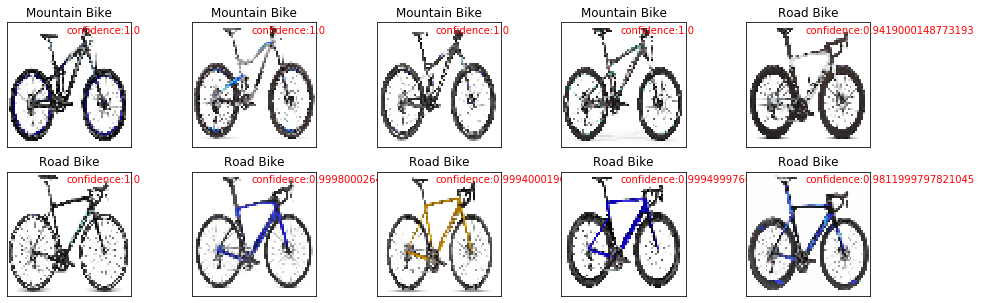

In [16]:
fig = plt.figure(figsize=(16,16))
for i in range(10):
#     print(cnt,data)
    img=fig.add_subplot(6,5,i+1)
    if predicted_cls[i] ==1:
        str_label ='Road Bike'
    else:
        str_label = 'Mountain Bike'
    img.imshow(x_test[i])
    img.text(30,5,f'confidence:{conf[i]}', color ='red')
    plt.title(str_label)
    img.axes.get_xaxis().set_visible(False)
    img.axes.get_yaxis().set_visible(False)


### Added cross validation section for better model evaluation
_define 10-fold cross validation test harness_

In [17]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [18]:
cvscores = []
for train, test in kfold.split(x, y[:,1]):
    model.fit(x[train], y[train], epochs=20,batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(x[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 100.00%
acc: 100.00%
100.00% (+/- 0.00%)


**Note**:  
_if you want to save / restore your model_  
model.save('tf-kerasclassifer.model')  
new_model = load_model("model.h5")